In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [3]:
!pwd

/Users/jasjotsingh/codes/pandas-tutorial


In [4]:
trips_data = pd.read_csv("datasets/biketrip.csv")

In [5]:
trips_data.shape

(669959, 11)

In [6]:
trips_data = trips_data.dropna()

In [7]:
trips_data.shape

(661650, 11)

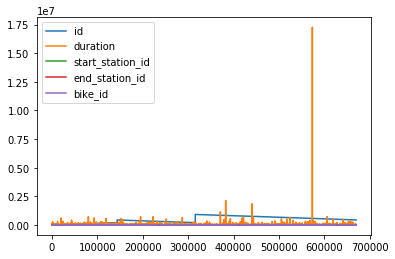

In [8]:
trips_data.plot()

In [9]:
trips_data['start_date'].describe() # for datetime type basic statistics are displayed

count              661650
unique             358183
top       10/28/2014 8:47
freq                   16
Name: start_date, dtype: object

In [10]:
trips_data['duration'].describe().round() # statistical measures of central tendency and variance are displayed

count      661650.0
mean         1078.0
std         22362.0
min            60.0
25%           343.0
50%           514.0
75%           749.0
max      17270400.0
Name: duration, dtype: float64

## Basic Histograms and Customized Histograms 

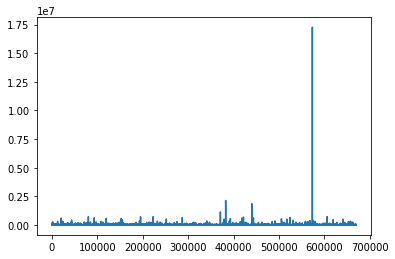

In [11]:
trips_data['duration'].plot() # pandas will interact with matplotlib  - default is linechart

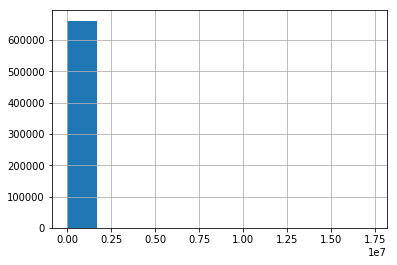

In [12]:
trips_data['duration'].hist() # displays histogram for duration of trips 
                              # press shift + enter when inside parenthesis followed by hist to see the 
                              # possible arguments of the hist attribute

In [13]:
# as it is observed that the data is verys skewed and maybe has outliers, we will remove outliers and then plot
reduced_trips_data = trips_data.loc[abs(trips_data.duration - trips_data.duration.mean()) <= (3*trips_data.duration.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'duration' using pandas indexing





In [14]:
reduced_trips_data.shape # not much outliers removed as data is not normally distributed 

(660962, 11)

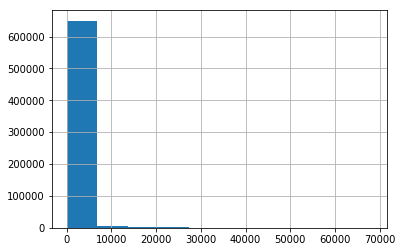

In [15]:
reduced_trips_data['duration'].hist() # still this does not help in obserbving the distribution of duration

In [16]:
trips_data['percentile'] = trips_data['duration'].rank(pct=True) # using rank method of pandas to assign percentile to each duration values
pct_95_trips_data= trips_data[trips_data['percentile']<=0.95] # to remove outliers, say, we accept to consider only 95% of the data observed

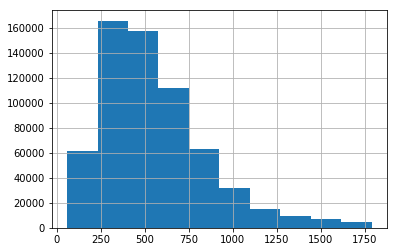

In [17]:
pct_95_trips_data.duration.hist() # now we can visualize the duration and make sense of it
plt.show() # to dsiplay the plot 
#It can be observed that maximum data points lie in the range 250-500 seconds of duration

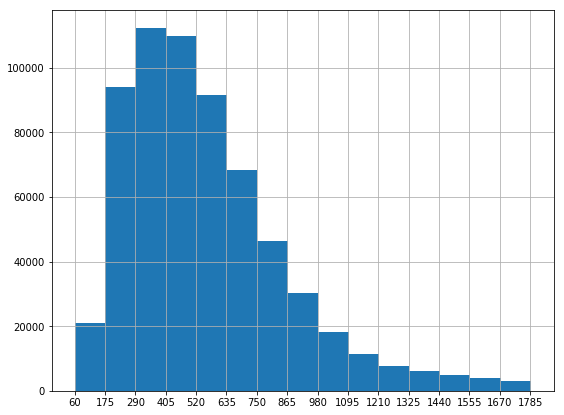

In [18]:

ax = pct_95_trips_data.duration.hist(bins=15, xlabelsize=10,figsize=(9,7)) # increased the number of bins to visualize with more granularity
                                            # set xlabelsize to and figure size make it legible
x_min = pct_95_trips_data.duration.min()
x_max = pct_95_trips_data.duration.max()
bin_size = (x_max - x_min)//15

xtick = [i for i in range(x_min,x_max,bin_size)] # to get list of bins 
ax.set_xticks( xtick ) # to set ticks for each bin
plt.show()
#Here we can say at a more granular level that max duration is between 290 and 405
# More arguments can be explored when you play around with histograms

## BOX PLOT

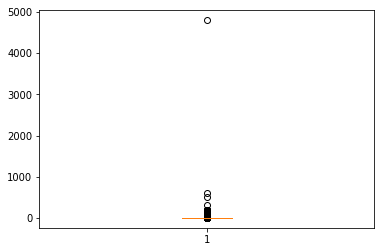

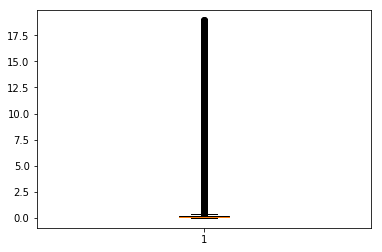

In [19]:
plt.boxplot(trips_data['duration']/3600) # convert to hours and we can observe that 
                                        # there are very small number of outliers on the higher side
plt.show()

plt.boxplot(reduced_trips_data['duration']/3600) # using outliers filtered dataset shows all 
                                            # the data lies between 0 and 20 hours duration
plt.show()

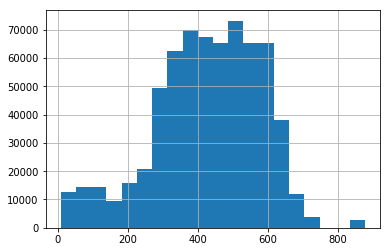

In [20]:
# To visualize the number of each bike type used in al the trips
trips_data['bike_id'].hist(bins=20)
plt.show()

## Visualizing 2 variables

In [21]:
# To visualize avg duration and no. of trips from each station
agg_trips_data = trips_data.groupby('start_station_id').agg({'id':'count','duration':['mean','sum']}).reset_index() # aggregatig data
agg_trips_data.columns= ['start_station_id','count','mean_duration','total_duration'] #to overwrite multi-column indexe with single index

In [22]:
agg_trips_data.head()

,start_station_id,count,mean_duration,total_duration
0,2,9525,917.151601,8735869
1,3,1547,4046.160310,6259410
2,4,3833,920.754761,3529253
3,5,1249,1131.907926,1413753
4,6,2895,1423.423489,4120811


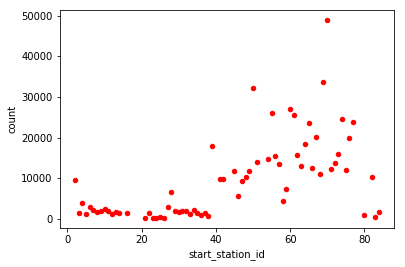

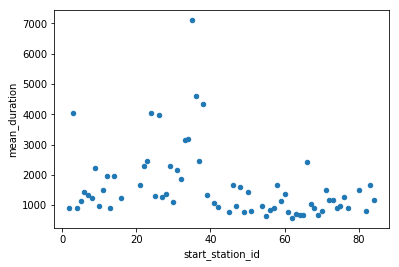

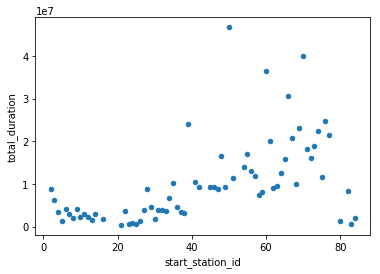

In [23]:
agg_trips_data.plot.scatter(x='start_station_id',y='count', s= 20, c= 'r')
# scetter plot, s = size of each point, c = color of each point
agg_trips_data.plot.scatter(x='start_station_id',y='mean_duration')

agg_trips_data.plot.scatter(x='start_station_id',y='total_duration')
# It can be observed that highest mean_duration per trip, total_duration 
# and no. of trips correspond to different start station IDs


In [24]:
#trips_data1 = trips_data.head()

In [25]:
trips_data['start_date'] = pd.to_datetime(trips_data['start_date'])
trips_data['weekday'] = trips_data['start_date'].dt.weekday

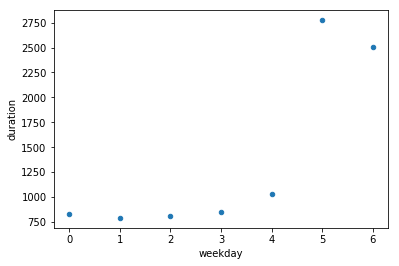

In [26]:
trips_data.groupby('weekday').duration.mean().reset_index().plot.scatter('weekday','duration')
plt.show() # It can be seen that average duration per trip is higher on weekends

In [27]:
weekday_agg = trips_data.groupby(['weekday','end_station_id']).duration.mean().reset_index()
weekday_agg.head() # each weekday, each end station id average duration per trip

,weekday,end_station_id,duration
0,0,2,552.548223
1,0,3,3730.955000
2,0,4,824.853571
3,0,5,612.134694
4,0,6,1298.606742


In [28]:
weekday_agg = weekday_agg[weekday_agg['end_station_id']<=15 ] # for sake of better visualization filtering for
                                                                # a sybset of end sation ids
                                                                

## Plotting 3 variables in 2-D

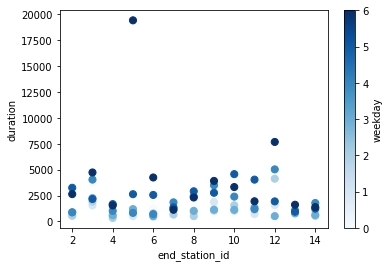

In [36]:
fig, ax = plt.subplots()

weekday_agg.plot(kind='scatter',x='end_station_id', y= 'duration', c='weekday', s= 50,cmap=plt.cm.Blues, ax=ax)

plt.show()
# Using colormap (cmap) to give color gradient to weekday number

## Summary
- plot, scatter, hist etc. can be directly applied to pandas dataframes
- aggregation by group by to generate respective statistical measures is done 
  and overall distribution can be seen by using the required visualization
- New columns are created like weekday, to aggregate and find some pattern in data via visualization


## Exercises

# Question
Find highest mean_duration per trip, total_duration 
and no. of trips for trip end stations? Are these station ids same as the ones calculated before for trip start station ids?

# Question
Find number of trips and average duration per trip for each bike id on each weekday via visualization?
Note:- Filter out for bike Ids less than 20 to get clear visualization
